### Análisis de Simulación

En este experimento, el parámetro `λ_max` (tasa máxima de llegadas) se varió entre 0.5 y 4.0, manteniendo constantes las tasas de servicio `μ1` y `μ2` en 1.2 y 1.5, respectivamente. Se midió el tiempo promedio que los clientes pasan en el sistema para cada valor de `λ_max`.

#### Parámetros Base:
- **λ_max**: 1.5 (tasa máxima de llegadas)
- **μ1**: 1.2 (tasa de servicio del servidor 1)
- **μ2**: 1.5 (tasa de servicio del servidor 2)
- **max_customers**: 50,000 (número máximo de clientes)

#### Observaciones:
Los resultados de la simulación proporcionan información sobre el impacto de variar `λ_max` en el tiempo promedio que los clientes pasan en el sistema.

Este análisis ayuda a comprender la relación entre las tasas de llegada y el rendimiento del sistema, particularmente en términos de congestión y eficiencia del servicio.

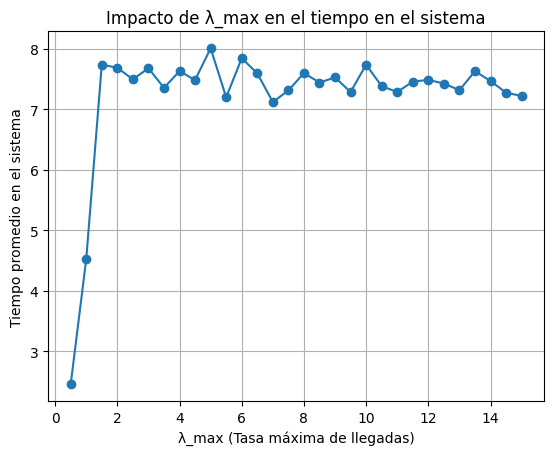

In [1]:
import matplotlib.pyplot as plt
from simulation import Simulation

lambd_values = [round(x * 0.5, 1) for x in range(1, 31)]
avg_times = []
for lambd in lambd_values:
    sim = Simulation(lambd, mu1=1.2, mu2=1.5, max_customers=50000)
    customers = sim.simulate_2_queue()
    times_in_system = sim.total_time_in_system(customers)
    avg_times.append(sum(times_in_system) / len(times_in_system))

plt.plot(lambd_values, avg_times, marker='o')
plt.xlabel('λ_max (Tasa máxima de llegadas)')
plt.ylabel('Tiempo promedio en el sistema')
plt.title('Impacto de λ_max en el tiempo en el sistema')
plt.grid(True)
plt.show()

In [2]:
from scipy.stats import ttest_1samp

test_value = 7.6

t_stat, p_value = ttest_1samp(avg_times, test_value)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Rechazar la hipótesis nula: Los tiempos promedio son significativamente diferentes del valor de prueba.")
else:
    print("No se puede rechazar la hipótesis nula: No hay una diferencia significativa con respecto al valor de prueba.")

T-statistic: -1.9333
P-value: 0.0630
No se puede rechazar la hipótesis nula: No hay una diferencia significativa con respecto al valor de prueba.


El test anterior parece indicar que para ``max_customers = 50000`` la media del tiempo que los clientes pasan en el sistema no difiere mucho de ``7.6s``. Pero si variamos esta cantidad de ``max_customers`` probando otras cantidades para los mismos ``λ_max`` obtendremos los siguientes gráficos.

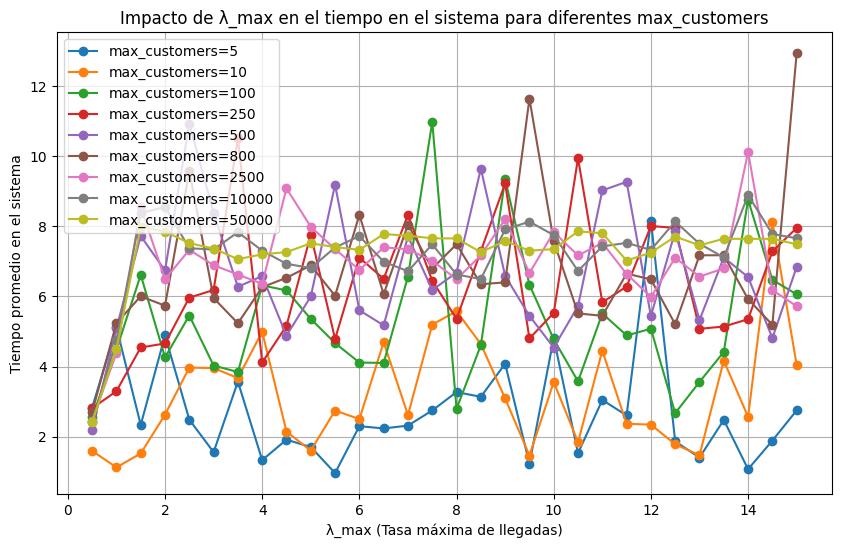

In [3]:
lambd_values = [round(x * 0.5, 1) for x in range(1, 31)]
max_customers_values = [5, 10, 100, 250, 500, 800, 2500, 10000, 50000]
plt.figure(figsize=(10, 6))

for max_customers in max_customers_values:
    avg_times = []
    for lambd in lambd_values:
        sim = Simulation(lambd, mu1=1.2, mu2=1.5, max_customers=max_customers)
        customers = sim.simulate_2_queue()
        times_in_system = sim.total_time_in_system(customers)
        avg_times.append(sum(times_in_system) / len(times_in_system))
    
    plt.plot(lambd_values, avg_times, marker='o', label=f'max_customers={max_customers}')

plt.xlabel('λ_max (Tasa máxima de llegadas)')
plt.ylabel('Tiempo promedio en el sistema')
plt.title('Impacto de λ_max en el tiempo en el sistema para diferentes max_customers')
plt.legend()
plt.grid(True)
plt.show()

Se puede notar que no es tan fácil de inferir por donde ronda la media para cantidades de ``max_customers`` pequeñas si variamos a su vez el parámetro ``λ_max``, esto nos indica que para cantidades pequeñas de clientes a atender la media tiende a ser más inestable al variar este parámetro, osea es más sensible. En cambio cuando la cantidad de clientes es grande, la media no parece ser tan sensible a cambios de ``λ_max``, esto pudiera indicar que el sistema se estabiliza y tiende a tomar tiempos parecidos.

#### Análisis de Sensibilidad a las Tasas de Servicio

Con el siguiente experimento se prueban distintas combinaciones de las tasas de servicio de los servidores 1 y 2 para ver de qué manera afectan al tiempo promedio que los usuarios pasan en el sistema.

Resultados de los casos:
Caso 1: μ1 = 1.0, μ2 = 1.0: Tiempo promedio en el sistema = 290.176
Caso 2: μ1 = 1.0, μ2 = 1.5: Tiempo promedio en el sistema = 192.314
Caso 3: μ1 = 1.5, μ2 = 1.0: Tiempo promedio en el sistema = 131.131
Caso 4: μ1 = 1.5, μ2 = 1.5: Tiempo promedio en el sistema = 4.301
Caso 5: μ1 = 2.0, μ2 = 2.0: Tiempo promedio en el sistema = 2.276
Caso 6: μ1 = 2.0, μ2 = 1.0: Tiempo promedio en el sistema = 108.859
Caso 7: μ1 = 1.0, μ2 = 2.0: Tiempo promedio en el sistema = 113.700
Caso 8: μ1 = 2.5, μ2 = 2.5: Tiempo promedio en el sistema = 1.473
Caso 9: μ1 = 2.5, μ2 = 1.5: Tiempo promedio en el sistema = 2.976
Caso 10: μ1 = 1.5, μ2 = 2.5: Tiempo promedio en el sistema = 3.039


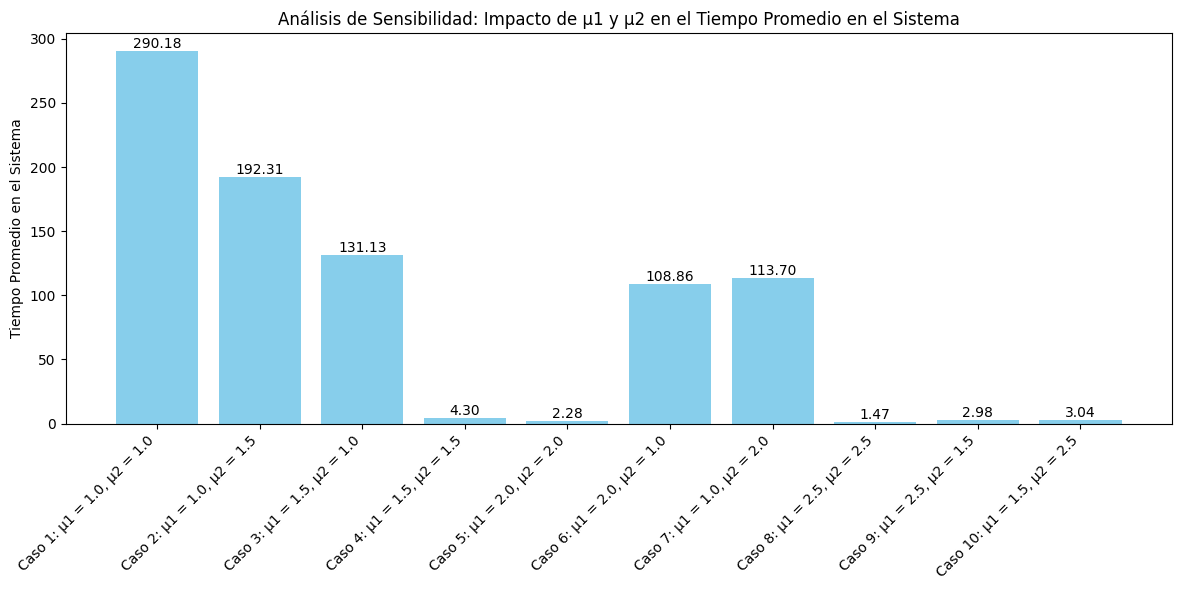

In [7]:
lambd_max = 1.5
max_customers = 50000

cases = [
    {"label": "Caso 1: μ1 = 1.0, μ2 = 1.0", "mu1": 1.0, "mu2": 1.0},
    {"label": "Caso 2: μ1 = 1.0, μ2 = 1.5", "mu1": 1.0, "mu2": 1.5},
    {"label": "Caso 3: μ1 = 1.5, μ2 = 1.0", "mu1": 1.5, "mu2": 1.0},
    {"label": "Caso 4: μ1 = 1.5, μ2 = 1.5", "mu1": 1.5, "mu2": 1.5},
    {"label": "Caso 5: μ1 = 2.0, μ2 = 2.0", "mu1": 2.0, "mu2": 2.0},
    {"label": "Caso 6: μ1 = 2.0, μ2 = 1.0", "mu1": 2.0, "mu2": 1.0},
    {"label": "Caso 7: μ1 = 1.0, μ2 = 2.0", "mu1": 1.0, "mu2": 2.0},
    {"label": "Caso 8: μ1 = 2.5, μ2 = 2.5", "mu1": 2.5, "mu2": 2.5},
    {"label": "Caso 9: μ1 = 2.5, μ2 = 1.5", "mu1": 2.5, "mu2": 1.5},
    {"label": "Caso 10: μ1 = 1.5, μ2 = 2.5", "mu1": 1.5, "mu2": 2.5},
]

results = {}
for case in cases:
    mu1 = case["mu1"]
    mu2 = case["mu2"]
    sim = Simulation(lambd_max, mu1, mu2, max_customers)
    customers = sim.simulate_2_queue()
    avg_system = np.mean(sim.total_time_in_system(customers))
    results[case["label"]] = avg_system

print("Resultados de los casos:")
for label, avg in results.items():
    print(f"{label}: Tiempo promedio en el sistema = {avg:.3f}")

plt.figure(figsize=(12, 6))
bars = plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Tiempo Promedio en el Sistema')
plt.title('Análisis de Sensibilidad: Impacto de μ1 y μ2 en el Tiempo Promedio en el Sistema')
plt.xticks(rotation=45, ha="right")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Cuando ambas tasas de servicio (`μ1` y `μ2`) toman valores cercanos, se observa una reducción significativa en el tiempo promedio que los clientes pasan en el sistema. Este comportamiento parece indicar que cuando las tasas de servicio de los servidores son similares, el sistema tiende a balancear la carga de manera más eficiente, distribuyendo equitativamente el trabajo entre los servidores. Esto reduce la probabilidad de que uno de los servidores se convierta en un cuello de botella, lo que a su vez disminuye los tiempos de espera y el tiempo total en el sistema.

Por otro lado, cuando las tasas de servicio son muy diferentes, el servidor con la tasa más baja puede convertirse en un punto de congestión, acumulando clientes y aumentando los tiempos de espera. Este fenómeno es consistente con los resultados observados en los experimentos, donde los casos con tasas de servicio similares presentan tiempos promedio más bajos en comparación con aquellos donde las tasas son dispares.